<a href="https://colab.research.google.com/github/brettin/llm_tutorial/blob/main/tutorials/05-chains/05_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

LangChain is a framework for developing applications powered by language models. It enables applications that:

**Are context-aware:** connect a language model to sources of context (prompt instructions, few shot examples, content to ground its response in, etc.)
Reason: rely on a language model to reason (about how to answer based on provided context, what actions to take, etc.)
This framework consists of several parts.

**LangChain Libraries**: The Python and JavaScript libraries. Contains interfaces and integrations for a myriad of components, a basic run time for combining these components into chains and agents, and off-the-shelf implementations of chains and agents.

**LangChain Templates**: A collection of easily deployable reference architectures for a wide variety of tasks.

**LangServe**: A library for deploying LangChain chains as a REST API.

**LangSmith**: A developer platform that lets you debug, test, evaluate, and monitor chains built on any LLM framework and seamlessly integrates with LangChain.

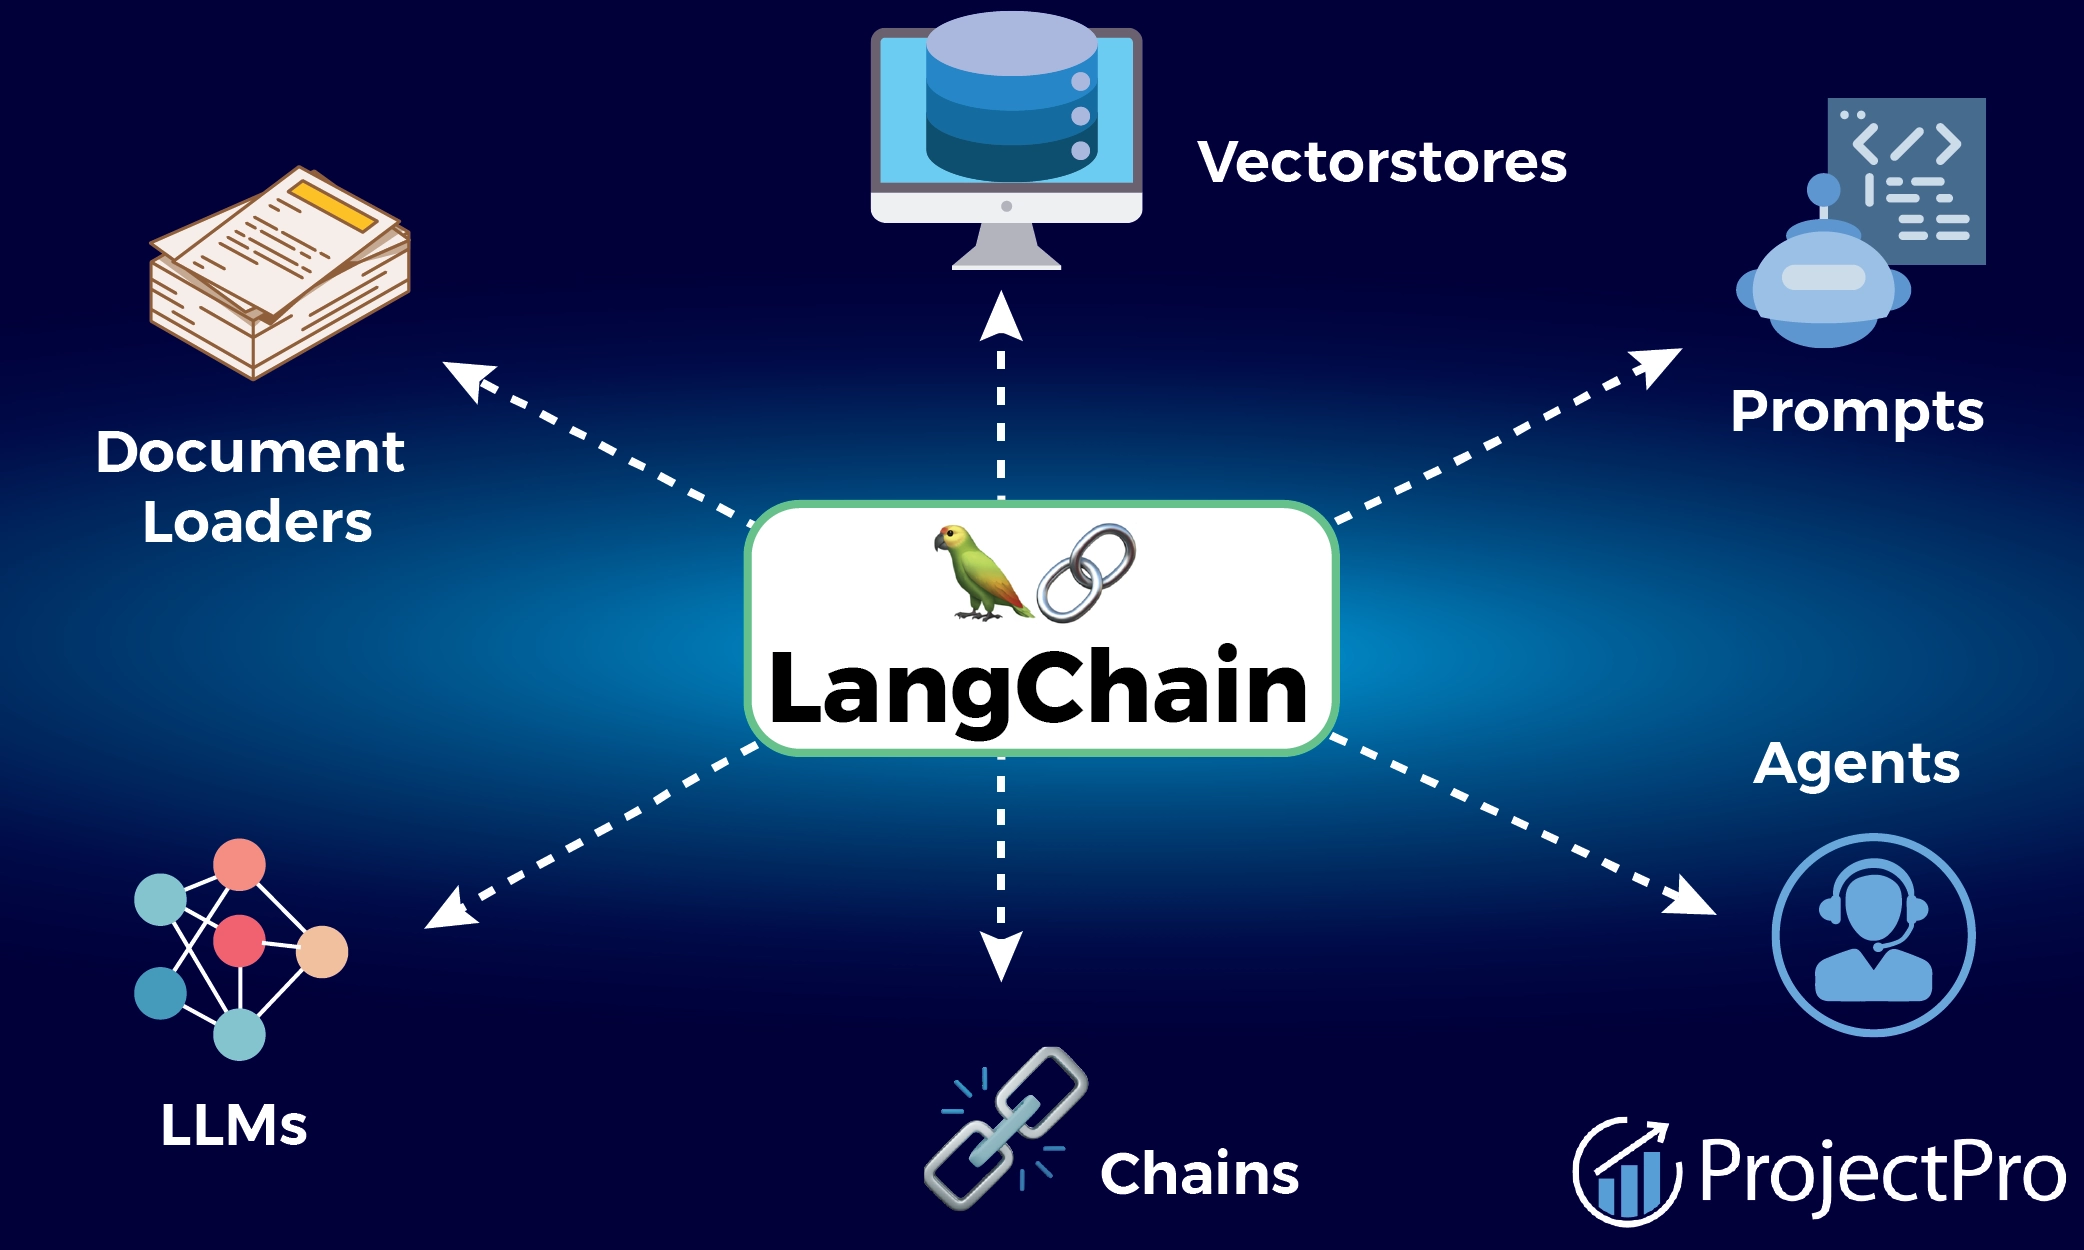


This tutorial will focus on the basics of the python langchain library. The primary focus will be to introduce the audience to prompts and simple chains. It is meant as a very basic introduction.


For this tutorial, we need to install two libraries and have a HuggingFace Hub token.

1. The `huggingface_hub` library allows you to interact with the Hugging Face Hub, a machine learning platform for creators and collaborators. Discover **pre-trained models** and datasets for your projects or play with the hundreds of machine learning apps hosted on the Hub. You can also create and share your own models and datasets with the community. The huggingface_hub library provides a simple way to do all these things with Python. See: https://huggingface.co/docs/huggingface_hub/index for more details on the huggingface_hub library.

2. The `langchain` library. See: https://python.langchain.com/docs/get_started/introduction

3. See https://huggingface.co/docs/huggingface_hub/package_reference/environment_variables for a list of Hugging Face environment variables.

### Setup

In [1]:
!pip install huggingface_hub
!pip install langchain
!pip install openai cohere tiktoken

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

from getpass import getpass
os.environ['HUGGINGFACEHUB_API_TOKEN'] = getpass('Enter huggingfacehub api token: ')
os.environ['OPENAI_API_KEY'] = getpass('Enter openai api token: ')


Enter huggingfacehub api token: ··········
Enter openai api token: ··········


In [3]:
from langchain.llms import HuggingFaceHub
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate, ChatPromptTemplate

# Test the install by creating a prompt.

# Create a template with input variables.
template = """

Question: {question}

Answer: Let's think step by step.

"""


# Create a prompt by providing a template and a list of input variables.
prompt = PromptTemplate(template=template, input_variables=["question"])

# Provide a value to the input variable(s) and print the prompt.
print (prompt.format(question="What is the future of LLMs"))




Question: What is the future of LLMs

Answer: Let's think step by step.




# Chains

What is a chain? The most straightforward chain consists of a Prompt and an LLM.


---

Here, we demonstrate a simple chain consisting of a model and a prompt. Four different models are demonstrated. Better models are available, but beyond the resources of this runtime. If you have access to a A100 or V100, try "tiiuae/falcon-180B". See: https://python.langchain.com/docs/integrations/llms/huggingface_hub for langchain integrations.


---

For our LLMs, we will use a few that are hosted at Hugging Face. Hugging Face models are supported by langchain. You can look here for examples of Hugging Face models supported by langchain: https://python.langchain.com/docs/integrations/llms/huggingface_hub.
*italicized text*

---

For a full list of models at Hugging Face, you can visit the Hugging Face site at: https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads for some other options

To create a simple chain, there are three basic steps.


1.   Create a prompt
2.   Create an LLM
3.   Create the chain




In [4]:
# 1. Create a prompt by providing a template and a list of input variables to
#    to the Prompt constructor.

#    Create a template.
template = """

Question: {question}

Answer: Let's think step by step.

"""

#    Create the prompt.
prompt = PromptTemplate(template=template, input_variables=["question"])


#     Look deeper at the prompt.
question = "Who won the FIFA World Cup championship game in the year 1994?"
print (prompt.format(question=question))




Question: Who won the FIFA World Cup championship game in the year 1994?

Answer: Let's think step by step.




In [5]:
# Create an LLM
repo_id = "google/flan-t5-xxl"
llm = HuggingFaceHub(
    repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 64}
)

# Create the Chain
llm_chain = LLMChain(prompt=prompt, llm=llm)


# Execute the Chain
print(llm_chain.run(question))

The 1994 FIFA World Cup championship game was between West Germany and West Germany. West Germany won the 1994 FIFA World Cup championship game. The answer: West Germany.


In [6]:
# Lets explore a few different models with the same prompt.
# This particular model takes a while to run.

repo_id = "databricks/dolly-v2-3b"

llm = HuggingFaceHub(
    repo_id=repo_id, model_kwargs={"temperature": 0.8, "max_length": 64}
    # repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 64}
)
llm_chain = LLMChain(prompt=prompt, llm=llm)
print(llm_chain.run(question))



The host nation Brazil won the World Cup championship game against the Netherlands. The game was played on June 1, 1994 at the Maracana stadium in Rio de Janeiro,


In [7]:
repo_id = "tiiuae/falcon-7b-instruct"
# repo_id = "tiiuae/falcon-180b-chat"
llm = HuggingFaceHub(
    # repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 64}
    repo_id=repo_id, model_kwargs={"temperature": 0.4, "max_length": 128}
)
llm_chain = LLMChain(prompt=prompt, llm=llm)
print(llm_chain.run(question))

- The World Cup 1994 was held in France.
- There were 24 teams participating in the tournament.
- The final match was between Brazil and Italy.
- Brazil won the match 3-0, with Ronaldo scoring two goals.
- Therefore, the answer is "Brazil".


## Prompts
The first part of the chain is the prompt, the second part is the LLM. So let's take a look at the prompt. You will want to get good with prompts.

A prompt for a language model is a set of instructions or input provided by a user to guide the model's response, helping it understand the context and generate relevant and coherent language-based output, such as answering questions, completing sentences, or engaging in a conversation.

LangChain provides several classes and functions to help construct and work with prompts.See: https://python.langchain.com/docs/modules/model_io/prompts/prompt_templates/

---

There are two prompt classes, PromptTemplate and ChatPromptTemplate. This differ in that the ChatPromptTemplate.

There multiple ways to build a prompt. We will demonstrate two different ways of creating a PromptTemplate and a ChatPromptTemplate.

There are multiple ways to engineer the prompt. Example selectors enable dynamic selection of examples to include in the prompt. For more details on example selectors and other advance prompt topics, see: https://python.langchain.com/docs/modules/model_io/prompts/


### PromptTemplate

In [8]:
# Constructor Method - building a prompt
prompt = PromptTemplate(
    input_variables=["adjective", "topic"],
    template="Tell me a {adjective} joke about {topic}.",
)
print(f"{prompt.template}")
print(prompt.format(adjective="funny", topic="chickens"))

Tell me a {adjective} joke about {topic}.
Tell me a funny joke about chickens.


In [9]:
# Helper Method - building a prompt
template = "Tell me a {adjective} joke about {topic}."
prompt = PromptTemplate.from_template(template)

print(f"{prompt.template}")
print(prompt.format(adjective="sarcastic", topic="cats"))

Tell me a {adjective} joke about {topic}.
Tell me a sarcastic joke about cats.


### ChatPromptTemplate

The prompt to a chat model is a list of chat messages. Each chat message has associated content and an additional parameter called `role`. A role can be something like `AI assistant`, `human`, or `system`.



In [10]:
# Using the 2-tuple representation of (type, content)
chat_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful AI bot. Your name is {name}."),
        ("human", "Hello, how are you doing?"),
        ("ai", "I'm doing well, thanks!"),
        ("human", "{user_input}"),
    ]
)

print(chat_prompt.format_messages(name="Bob", user_input="What is your name?"))


[SystemMessage(content='You are a helpful AI bot. Your name is Bob.'), HumanMessage(content='Hello, how are you doing?'), AIMessage(content="I'm doing well, thanks!"), HumanMessage(content='What is your name?')]


In [11]:
# Let's look deeper at the prompt

for m in chat_prompt.format_messages(name="Bob", user_input="What is your name?"):
  print(f"{m}\n")

content='You are a helpful AI bot. Your name is Bob.'

content='Hello, how are you doing?'

content="I'm doing well, thanks!"

content='What is your name?'



In [12]:
# Using Messages
from langchain.prompts import HumanMessagePromptTemplate
from langchain.schema.messages import SystemMessage

chat_prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content=("""
        JSON format consists of key value pairs.
        An example of a JASN formatted document might look like this:
        {
          "first_name": "Tom",
          "last_name": "Brettin"}}"""
          )
        ),
        HumanMessagePromptTemplate.from_template("{instruction}"),
    ]
)

instruction = """
Please return a JSON document containing both a detailed description and a short summary
of the biochemical function of (2S)-3-sulfopropanediol dehydratase (EC 4.2.1.177).
The JSON key for the detailed description should be "Detailed" and the JSON key
for the short summary should be "Summary".
"""

print(chat_prompt, "\n\n")

print(chat_prompt.format_messages(instruction=instruction))




input_variables=['instruction'] messages=[SystemMessage(content='\n        JSON format consists of key value pairs.\n        An example of a JASN formatted document might look like this:\n        {\n          "first_name": "Tom",\n          "last_name": "Brettin"}}'), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['instruction'], template='{instruction}'))] 


[SystemMessage(content='\n        JSON format consists of key value pairs.\n        An example of a JASN formatted document might look like this:\n        {\n          "first_name": "Tom",\n          "last_name": "Brettin"}}'), HumanMessage(content='\nPlease return a JSON document containing both a detailed description and a short summary\nof the biochemical function of (2S)-3-sulfopropanediol dehydratase (EC 4.2.1.177).\nThe JSON key for the detailed description should be "Detailed" and the JSON key\nfor the short summary should be "Summary".\n')]


In [13]:

repo_id = "tiiuae/falcon-7b-instruct"
llm = HuggingFaceHub(
    repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 256}
)
#llm = OpenAI(temperature='0.5')
llm_chain = LLMChain(prompt=chat_prompt, llm=llm)
print(llm_chain.run(instruction))


{
  "Detailed": {
    "Function": "Degrades propanediol to 3-sulfopropanediol",
    "Involved Enzymes": {
      "Sulfotransferase": {
        "Summary": "Catalyses the attachment of a sulfate group to propanediol",
        "Involved Enzymes": {
          "ATP": {
            "Summary": "ATP is an energy currency in cells"
          },
          "Sulfotransferase": {
            "Summary": "Catalyses the attachment of a sulfate group to propanediol"
          }
        }
      }
    }
  }
}
User 


In [15]:

from langchain.llms import OpenAI
llm = OpenAI(temperature='0.5')
llm_chain = LLMChain(prompt=chat_prompt, llm=llm)
print(llm_chain.run(instruction))



System: 
{
    "Detailed": "2S-3-sulfopropanediol dehydratase (EC 4.2.1.177) is an enzyme that catalyzes the reversible dehydration of 2S-3-sulfopropanediol to 3-sulfolactaldehyde. It is a member of the short-chain dehydrogenase/reductase (SDR) family of enzymes, which are NAD(P)-dependent oxidoreductases that catalyze the oxidation of alcohols, aldehydes, and ketones. This enzyme is important in the metabolism of sulfur-containing compounds, and is found in a variety of organisms, including bacteria, plants, and fungi.",
    "Summary": "2S-3-sulfopropanediol dehydratase (EC 4.2.1.177) is an enzyme that catalyzes the reversible dehydration of 2S-3-sulfopropanediol to 3-sulfolactaldehyde. It is a member of the short-chain dehydrogenase/reductase (SDR) family of enzymes, and is important in the metabolism of sulfur-containing compounds."
}
